Data from: https://www.metoffice.gov.uk/hadobs/hadex3/

In [1]:
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = xr.open_dataset('HadEX3_TXx_ANN.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:         (time: 118, longitude: 192, bnds: 2, latitude: 144)
Coordinates:
  * time            (time) datetime64[ns] 1901-07-01 1902-07-01 ... 2018-07-01
  * longitude       (longitude) float64 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * latitude        (latitude) float64 -89.38 -88.12 -86.88 ... 88.12 89.38
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (longitude, bnds) float64 ...
    latitude_bnds   (latitude, bnds) float64 ...
    TXx             (time, latitude, longitude) float32 ...
Attributes: (12/33)
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    source:                     HadEX3 data product
    institution:                Met Office Hadley Centre, Exeter, UK
    Conventions:                CF-1.6
    title:                      TXx
    references:                 Dunn, Alexander et al. 2020, Journal of Geoph...
    ...                         ...
    time_coverage_resolution:   Monthly
    CDO:                        Climate Data Operators version 1.9.8 (https:/...
    DOI:                        https://doi.org/10.1029/2019JD032263
    dataset_version:            3.0.4
    NCO:                        netCDF Operators version 4.7.5 (Homepage = ht...
    history:                    Thu Sep 23 10:15:46 2021: ncatted -O -a histo...

In [4]:
txx_mean = ds['TXx'].mean('time')

In [5]:
txx_max = ds['TXx'].max('time')

In [6]:
txx_min = ds['TXx'].min('time')

In [7]:
txx_std = ds['TXx'].std('time')

In [8]:
txx_range = txx_max - txx_min

In [9]:
txx_cov = txx_std / txx_mean

In [23]:
danger = xr.where((txx_max > 40) & (txx_range > 7), 1, 0)

In [101]:
def plot_data(da, title, cbar_levels=None, contours=None, outfile=None):
    """Blah"""

    fig = plt.figure(figsize=[16,8])
    ax = fig.add_subplot(111, projection=ccrs.Robinson())

    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor=None, facecolor='0.8')
    
    da.plot.imshow(
        ax=ax,
        levels=cbar_levels,
        extend='both',
        transform=ccrs.PlateCarree(),
        cmap='hot_r',
    )
    if type(contours) == xr.core.dataarray.DataArray:
        contours.plot.contour(
            ax=ax,
            transform=ccrs.PlateCarree(),
            levels=[0.5, 1.5],
            colors='tab:cyan',
        )
    ax.set_extent([-179.9, 179.9, -90, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.BORDERS, linewidth=0.3)
    ax.coastlines()
    ax.gridlines(
        crs=ccrs.PlateCarree(),
        draw_labels=False,
        linewidth=1,
        color='gray',
        alpha=0.5,
        linestyle='--'
    )
    plt.title(title)
    if outfile:
        plt.savefig(outfile, bbox_inches='tight', facecolor='white', dpi=300)
    else:
        plt.show()

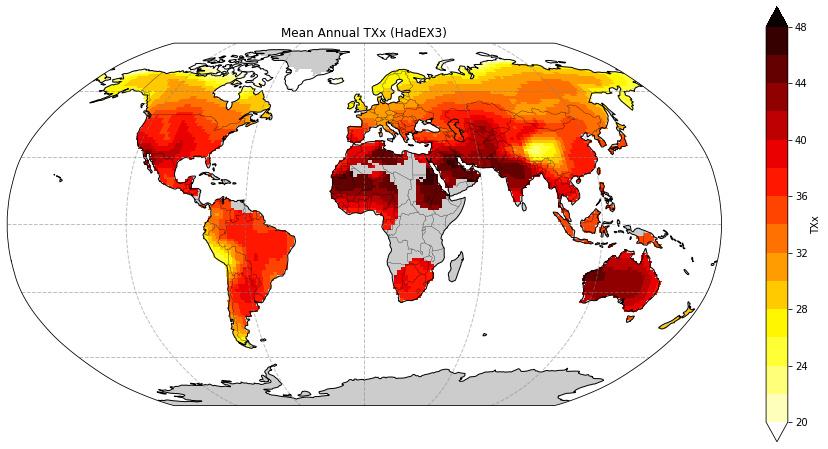

In [95]:
plot_data(
    txx_mean, 
    'Mean Annual TXx (HadEX3)',
    cbar_levels=np.arange(20, 50, 2),
    outfile='annual-txx_mean_HadEX3.png'
)

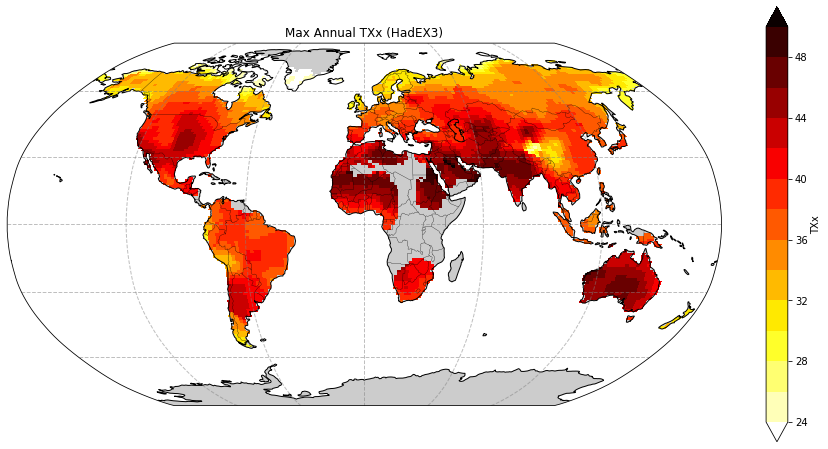

In [103]:
plot_data(
    txx_max, 
    'Max Annual TXx (HadEX3)',
    cbar_levels=np.arange(24, 52, 2),
    outfile='annual-txx_max_HadEX3.png',
)

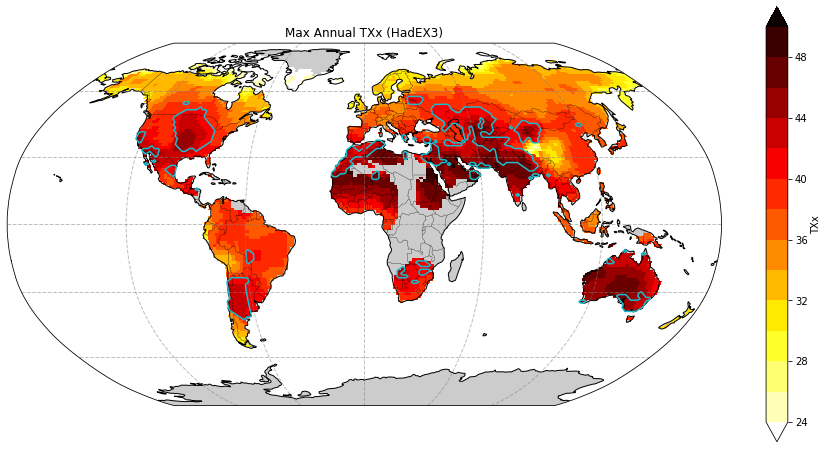

In [104]:
plot_data(
    txx_max, 
    'Max Annual TXx (HadEX3)',
    cbar_levels=np.arange(24, 52, 2),
    outfile='annual-txx_max_HadEX3_danger.png',
    contours=danger,
)

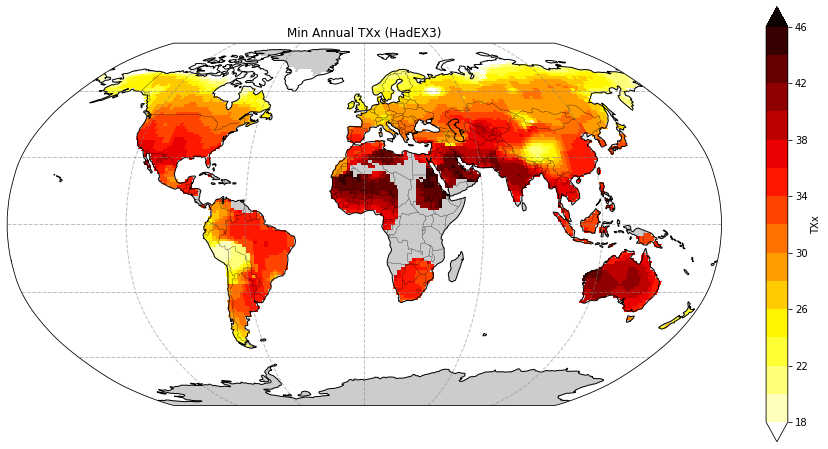

In [105]:
plot_data(
    txx_min, 
    'Min Annual TXx (HadEX3)',
    cbar_levels=np.arange(18, 48, 2),
    outfile='annual-txx_min_HadEX3.png'
)

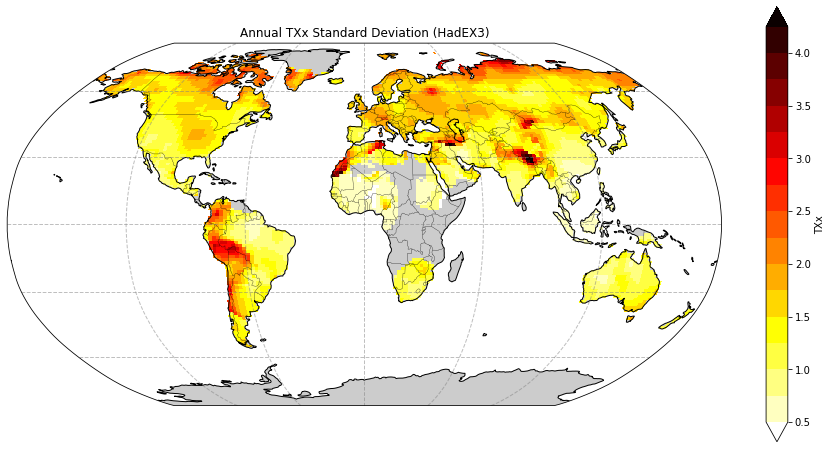

In [106]:
plot_data(
    txx_std,
    'Annual TXx Standard Deviation (HadEX3)',
    cbar_levels=np.arange(0.5, 4.5, 0.25),
    outfile='annual-txx_std_HadEX3.png'
)

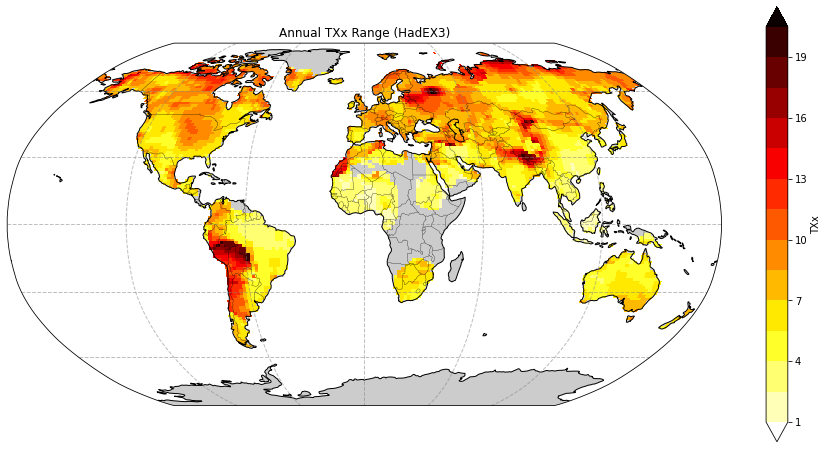

In [107]:
plot_data(
    txx_range,
    'Annual TXx Range (HadEX3)',
    cbar_levels=np.arange(1, 21, 1.5),
    outfile='annual-txx_range_HadEX3.png',
)

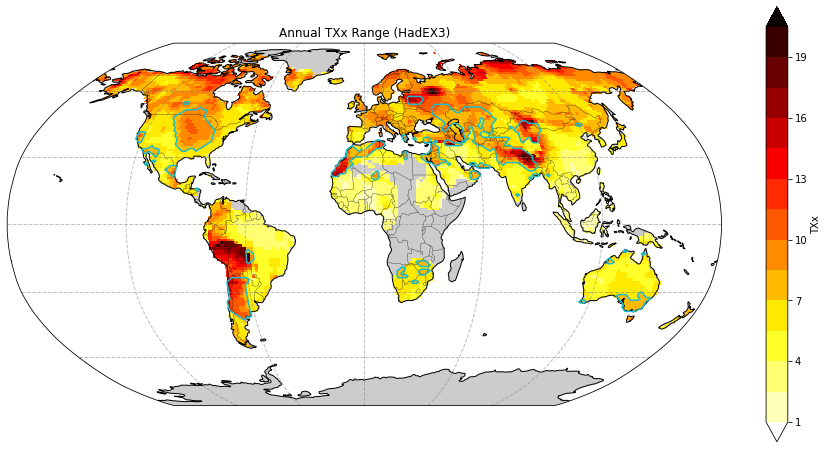

In [108]:
plot_data(
    txx_range,
    'Annual TXx Range (HadEX3)',
    cbar_levels=np.arange(1, 21, 1.5),
    outfile='annual-txx_range_HadEX3_danger.png',
    contours=danger,
)

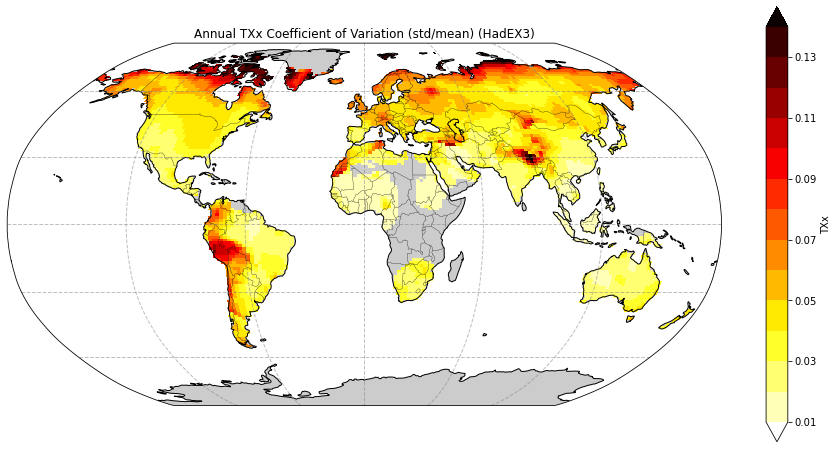

In [109]:
plot_data(
    txx_cov, 
    'Annual TXx Coefficient of Variation (std/mean) (HadEX3)',
    cbar_levels=np.arange(0.01, 0.15, 0.01),
    outfile='annual-txx_cov_HadEX3.png'
)